# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) November 2022

## Name :- Sairaj Kiran Waykool

### Domain:- Data Science & Business Analytics

##### Task 6 : Prediction using machine learning algorithm 

#### Problem statement :

Create the Decision Tree Classifier and visualize it graphically The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
The aim of this project is to predict the species of iris flower on the iris dataset when we feed any new data to this classifier using Decision Tree Classifier.

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## reading the data
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape
## It gives the number of rows and columns
## number of rows are 150 
## number of columns are 6

(150, 6)

In [4]:
## inspecting missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
## unique values
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
## Seperation of X and y Features
X=data.iloc[:,0:4]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

## Train test split is a model validation procedure that reveals how our model performs on new data. 
## In this model, 80% of the dataset goes into the training set and 20% of the dataset goes into the testing set.

In [7]:
## Model fitting

model_fit=DecisionTreeClassifier()
model_fit.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
## Prediction using Decision tree model
y_pred=model_fit.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [9]:
## Model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [10]:
# creating decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

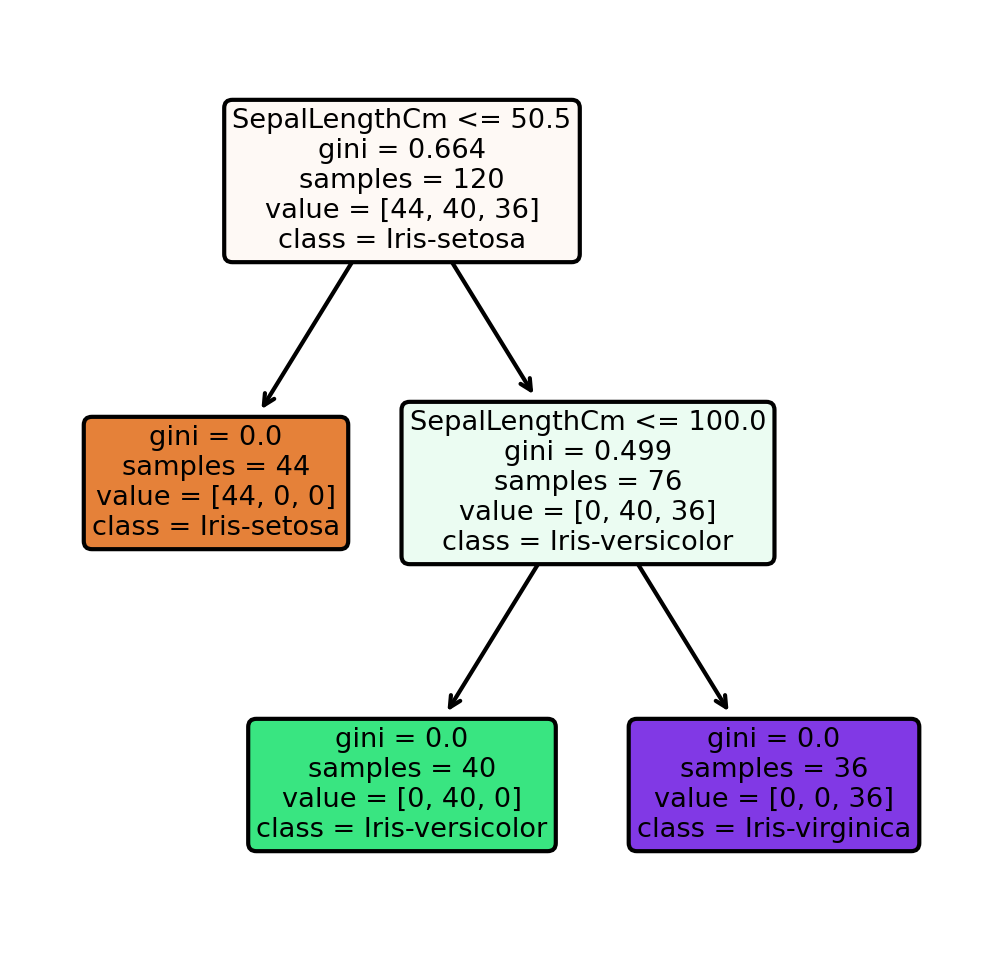

In [11]:
## Visualization
feature_name=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_name=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True,
              rounded = True);
fig.savefig('dtree.png')

The main idea of a decision tree is to identify the features which contain the most information regarding the target feature and then split the dataset along the values of these features such that the target feature values at the resulting nodes are as pure as possible. A feature that best separates the uncertainty from information about the target feature is said to be the most informative feature. The search process for a most informative feature goes on until we end up with pure leaf nodes.

On the first node,we can analyze that

Our model seems to have decided that the feature it wants to make a decision on is petal width. It also chose 0.8 as the dividing value gini is the impurity of the node. The gini index is calculated by subtracting the sum of the squared probabilities of each class from one samples is the amount of training samples that went through this node. In this case, all of them used since it's the first node.

#### Testing and measuring performance

In [12]:
# predict accuracy score
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
## confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 6  0  0]
 [ 0 10  0]
 [ 0  0 14]]


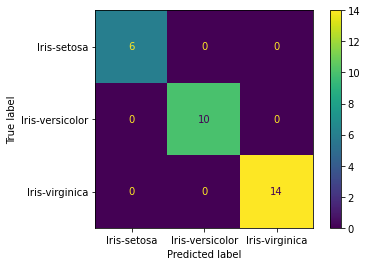

In [14]:
## confusion matrix plot
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_fit,X_test,y_test)

A confusion matrix is used to describe the performance of a classification model on a set of test data for which the true values are known

A classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown above.

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives.

#### Result

According to a classification report and confusion matrix, we can conclude that:

9 of 9 Iris-setosa samples is correctly classified 11 of 12 Iris-versicolor samples is correctly classified. 1 sample was incorrectly classified as Iris-virginica 9 of 9 Iris-virginica samples is correctly classified Accuracy value of 97% means that identification of 3 of every 100 flowers is incorrect, and 97 is correct.